In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import numpy as np
from sklearn.ensemble import RandomForestRegressor


In [2]:
df=pd.read_csv(r'C:\Users\v-narku\Desktop\pythonPractices\Real_data.csv')

In [3]:
X=df.iloc[:,:-1]
Y=df['PM2.5']

In [49]:
# X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.23,random_state=0)

# # # # X_train.shape, X_test.shape
# # X_train['PP']=pd.to_numeric(X_train['PP'],errors='coerce').fillna(X_train['PP'].mean())
# # X_train['VM']=pd.to_numeric(X_train['VM'],errors='coerce').fillna(X_train['VM'].mean())

# # X_test['PP']=pd.to_numeric(X_test['PP'],errors='coerce').fillna(X_test['PP'].mean())
# # X_test['VM']=pd.to_numeric(X_test['VM'],errors='coerce').fillna(X_test['VM'].mean())

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.23, random_state = 40)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\v-narku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\v-narku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\v-narku\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [5]:
import statsmodels.api as sm 
X_train1 = sm.add_constant(X_train)
model =sm.OLS(y_train,X_train1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     20.74
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           2.96e-26
Time:                        13:22:03   Log-Likelihood:                -2284.9
No. Observations:                 404   AIC:                             4588.
Df Residuals:                     395   BIC:                             4624.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.7083      3.481     31.515      0.0

In [60]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train)
sel.fit(X_test)

VarianceThreshold(threshold=0.01)

C:\Users\v-narku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


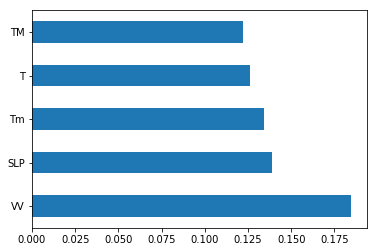

In [6]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()



In [7]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train,y_train)
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))


Coefficient of determination R^2 <-- on train set: 0.29579266419150874
Coefficient of determination R^2 <-- on train set: -0.12630229863510922


In [8]:
from sklearn.model_selection import RandomizedSearchCV


 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15,25,50,75,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5,7, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 7, verbose=2, random_state=42, n_jobs = 1)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 25, 50, 75, 100], 'min_samples_leaf': [1, 2, 5, 7, 10]}


In [9]:
rf_random.fit(X_train,y_train)

Fitting 7 folds for each of 100 candidates, totalling 700 fits
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.1s
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.1s
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.1s
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.1s
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.1s
[CV] n_estimators=300, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=300, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.1s
[CV] n_estimators=300, min_samples_split=50

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.0s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.0s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=15, total=   0.2s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=15, total=   0.2s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=15, total=   0.2s
[CV] n_estimators=300, min_samples_split=2, mi

[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=300, min_samples

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=300, min_samples_split=25, min_s

[CV]  n_estimators=1000, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=1000, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=1000, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=75, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   0.3s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   0.3s
[CV] n_estimators=700, min_samples_spli

[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=7, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=7, max_features=auto, max_depth=5 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=7, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=1200, min_samples_split=75, min_samples_leaf=7, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1200, min_samples_split=75, min_samples_leaf=7, max_features=sqrt, max_depth=15, total=   0.5s
[CV] n_estimators=1200, min_samples_split=75, min_samples_leaf=7, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1200, min_samples_split=75, min_samples_leaf=7, max_features=sqrt, max_depth=15, total=   0.5s
[CV] n_estimators=1200, min_samples_split=75, min_samples_leaf=7, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1200, min_samples_split=75, min_samples_leaf=7, max_features=sqrt, max_depth=15, total=   0.5s
[CV] n_estimators=1200, min_samples_s

[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=100, min_samples

[CV]  n_estimators=700, min_samples_split=75, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.3s
[CV] n_estimators=600, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=600, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=600, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=600, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=600, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=600, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=600, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=600, min_samples_split=50, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=600, min_samples_split=50

[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=10, total=   0.0s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=10, total=   0.0s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=10, total=   0.0s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=10, total=   0.0s
[CV] n_estimators=1200, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.7s
[CV] n_estimators=1200, min_samples_spl

[CV]  n_estimators=400, min_samples_split=25, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=400, min_samples_split=25, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=25, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=400, min_samples_split=25, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=25, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=400, min_samples_split=25, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=25, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=400, min_samples_split=25, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=25, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=400, min_samples_split=25

[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=7, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=7, max_features=sqrt, max_depth=10 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=7, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=7, max_features=sqrt, max_depth=10 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=7, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.3s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.3s
[CV] n_estimators=700, min_samples_split=2, min_samp

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=15, total=   0.2s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=15, total=   0.2s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=15, total=   0.2s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=15, total=   0.2s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=15, total=   0.2s
[CV] n_estimators=300, min_samples_split=15, min_sam

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=7, max_features=sqrt, max_depth=20, total=   0.1s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=7, max_features=sqrt, max_depth=15 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=7, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=7, max_features=sqrt, max_depth=15 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=7, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=7, max_features=sqrt, max_depth=15 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=7, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=7, max_features=sqrt, max_depth=15 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=7, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=600, min_samples_split=5, min_samp

[CV]  n_estimators=200, min_samples_split=75, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.0s
[CV] n_estimators=200, min_samples_split=75, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=75, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.0s
[CV] n_estimators=200, min_samples_split=75, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=75, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.0s
[CV] n_estimators=700, min_samples_split=50, min_samples_leaf=7, max_features=auto, max_depth=25 
[CV]  n_estimators=700, min_samples_split=50, min_samples_leaf=7, max_features=auto, max_depth=25, total=   0.4s
[CV] n_estimators=700, min_samples_split=50, min_samples_leaf=7, max_features=auto, max_depth=25 
[CV]  n_estimators=700, min_samples_split=50, min_samples_leaf=7, max_features=auto, max_depth=25, total=   0.4s
[CV] n_estimators=700, min_samples_split=50

[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=7, max_features=auto, max_depth=25, total=   0.4s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=7, max_features=auto, max_depth=25 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=7, max_features=auto, max_depth=25, total=   0.4s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=7, max_features=auto, max_depth=25 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=7, max_features=auto, max_depth=25, total=   0.4s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=7, max_features=auto, max_depth=25 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=7, max_features=auto, max_depth=25, total=   0.5s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=7, max_features=auto, max_depth=25 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=7, max_features=auto, max_depth=25, total=   0.4s
[CV] n_estimators=800, min_samples

[CV]  n_estimators=200, min_samples_split=75, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.0s
[CV] n_estimators=200, min_samples_split=75, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=75, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.0s
[CV] n_estimators=600, min_samples_split=75, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=75, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=600, min_samples_split=75, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=75, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=600, min_samples_split=75, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=75, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=600, min_samples_sp

[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=1000, min_sample

[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:  5.5min finished
C:\Users\v-narku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=7, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 25, 50, 75, 100], 'min_samples_leaf': [1, 2, 5, 7, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

# EDA

In [11]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 25,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 30}

In [12]:
rf_random.best_score_

-4910.758624401336

In [13]:
predictions=rf_random.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 52.75221360403104
MSE: 5524.350947711513
RMSE: 74.32597761019704


In [14]:
import pickle
pickle_out = open("Randonforest.pkl","wb")
pickle.dump(rf_random, pickle_out)
pickle_out.close()

In [17]:
data=np.array([13.7,21,5.6,1018.8,71,1.3,1.5,7.6])
data=data.reshape(1,-1)
predictions=rf_random.predict(data)
print('AirQuality index for data is {}'.format(predictions[0]))

AirQuality index for data is 91.82019370053646


In [ ]:
def predict():
    int_features = [float(x) for x in request.form.values()]
    print(int_features)
    final_features = np.array(int_features)
    data=final_features.reshape(1,-1)
    predictions=model.predict(data)
    output = round(predictions[0], 2)
    return render_template('home.html', prediction_text='AQI for Delhi {}'.format(output))

In [15]:
from flask import Flask, request, jsonify, render_template, url_for

# Decision Tree

In [72]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion="mse")
dtree.fit(X_train,y_train)
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 1.0
Coefficient of determination R^2 <-- on test set: -1.0938992517506412


In [77]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,Y,cv=5)
score.mean()

-0.8782023771137965

In [83]:
## Hyper Parameter Optimization
params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

from sklearn.model_selection import GridSearchCV
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)
random_search.fit(X,Y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 4253 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 13213 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 25757 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 41885 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 61597 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 86473 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 102400 out of 102400 | elapsed:  3.0min finished
C:\Users\v-narku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'splitter': ['best', 'random'], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4], 'max_features': ['auto', 'log2', 'sqrt', None], 'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [84]:
random_search.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': 60,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [85]:
random_search.best_score_

-5148.350085524439

In [86]:
predictions=random_search.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 99.43693390684864
MSE: 11888.067778057657
RMSE: 109.03241618004095
